<a href="https://colab.research.google.com/github/Greta-gerasimov/Project_libraries/blob/dev/K_nearest_neighbors_%2B_Kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1**.Загружаю необходимые библиотеки

In [24]:
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

from sklearn.cluster import KMeans


**2**.Выгружаю из библиотеки sklearn доступный датасет по калифорнии. завожу переменные и присваиваю им соответсвующие данные из датасета: 


*   housing
*   data
*   feature_names
*   target





In [25]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()

In [26]:
housing.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [27]:
data = housing.data
target = housing.target
feature_names = housing.feature_names


**3**. Создаю датафреймы X и y

In [28]:
X = pd.DataFrame(data, columns = feature_names)
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [29]:
y = pd.DataFrame(target, columns = ['price'])
y.head()

,price
0,4.526
1,3.585
2,3.521
3,3.413
4,3.422


**4**.Разделяю выборку на тренировочный и тестовый датасет (20% - тест от всех данных).

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [32]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((16512, 8), (4128, 8), (16512, 1), (4128, 1))

In [33]:

X_train.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000
mean,3.880754,28.608285,5.435235,1.096685,1426.453004,3.096961,35.643149,-119.582290
std,1.904294,12.602499,2.387375,0.433215,1137.056380,11.578744,2.136665,2.005654
min,0.499900,1.000000,0.888889,0.333333,3.000000,0.692308,32.550000,-124.350000
25%,2.566700,18.000000,4.452055,1.006508,789.000000,2.428799,33.930000,-121.810000
50%,3.545800,29.000000,5.235874,1.049286,1167.000000,2.817240,34.260000,-118.510000
75%,4.773175,37.000000,6.061037,1.100348,1726.000000,3.280000,37.720000,-118.010000
max,15.000100,52.000000,141.909091,25.636364,35682.000000,1243.333333,41.950000,-114.310000


**5**. После разбиения и проверки масштаба выборки, нужно провести стандартизацию признаков

In [34]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [35]:
X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=feature_names)

X_test_scaled = scaler.fit_transform(X_test)

X_test_scaled = pd.DataFrame(X_test_scaled, columns=feature_names)

**6**. Построю модель TSNE *(T-distributed Stochastic Neighbor Embedding) *на тренировочных данных и построю диаграмму рассеяния 

In [36]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, learning_rate = 250, random_state=42)


In [37]:
X_train_tsne = tsne.fit_transform(X_train_scaled)

In [38]:
X_train_tsne

array([[ 13.662198 , -47.456432 ],
       [ -9.588578 ,  -6.133586 ],
       [-37.740097 ,  -7.5562005],
       ...,
       [ 54.507053 ,  -7.3015356],
       [-59.25215  ,  27.512106 ],
       [ 17.544436 ,  94.95726  ]], dtype=float32)

In [39]:
X_train_tsne.shape

(16512, 2)

<function matplotlib.pyplot.show>

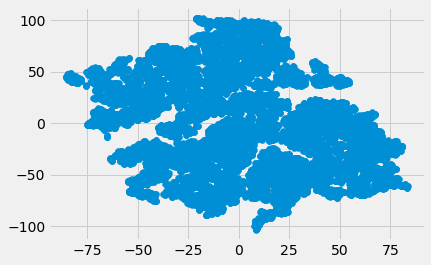

In [40]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])
plt.show

Разделение на **три** кластера при помощи алгоритма кластеризации **KMeans**

In [41]:
model_Kmeans = KMeans(n_clusters = 3, max_iter= 100, random_state= 42)

Обучение модели при помощи **fit_predict**(вычисление центров кластеров и предсказание индеса кластера для каждой выборки)

In [42]:
labels_train = model_Kmeans.fit_predict(X_train_scaled)

In [43]:
print(labels_train)

[0 0 0 ... 0 1 1]


In [44]:
pd.value_counts(labels_train)

0    9510
1    6937
2      65
dtype: int64

аналогично для тестовой выборки фичей

In [45]:
labels_test = model_Kmeans.fit_predict(X_test_scaled)

In [46]:
pd.value_counts(labels_test)

0    2429
1    1698
2       1
dtype: int64

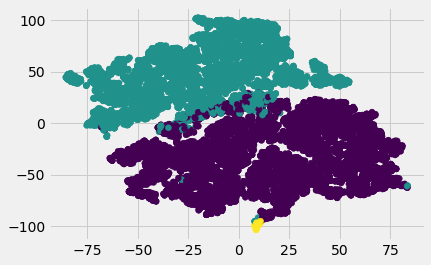

In [50]:

plt.scatter(X_train_tsne[:,0],X_train_tsne[:,1], c = labels_train)


**8**. Построение гистограммы средн

In [51]:
y_train.mean()

price    2.071947
dtype: float64

In [52]:
y_train[labels_train == 0].mean()

price    2.142137
dtype: float64

In [53]:
y_train[labels_train == 1].mean()

price    1.979968
dtype: float64

In [54]:
y_train[labels_train == 2].mean()

price    1.618831
dtype: float64

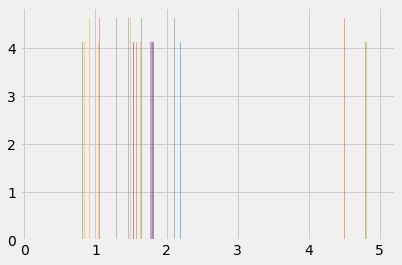

In [55]:
plt.hist(y_train[labels_train == 0], bins=20, density=True, alpha=0.5)
plt.hist(y_train[labels_train == 1], bins=20, density=True, alpha=0.5)
plt.hist(y_train[labels_train == 2], bins=20, density=True, alpha=0.5)

plt.show()